<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/Sistemas_de_recomendacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este notebook vamos a dar nuestros primeros pasos en los sistemas de recomendación. Iremos avanzando poco a poco hasta crear un sistema de recomendación robusto que nos permita ejemplizar esta técnita.

Para ello, vamos autilizar un conjunto de datos de la plataforma [Movielens](https://movielens.org).

# Preparación del notebook y obtención de los datos

Después de habernos descargados los archivos, los guardamos en nuestro drive y activamos el acceso, así podremos acudir a ellos cada vez que lo necesitemos.

Como siempre, debemos de importar las librerías necesarias para poder desarrollar nuestro proyecto.

In [1]:
# importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# montamos el drive, para trabajar directamente con el

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# creamos nuestros datasets

peliculas = pd.read_csv("/content/drive/MyDrive/data/movies.csv",
                     names = ["peliculaId", "titulo", "generos"],
                     header = 0,
                     index_col = "peliculaId"
                    )

notas = pd.read_csv("/content/drive/MyDrive/data/ratings.csv",
                      names = ["usuarioId", "peliculaId", "nota", "momento"],
                      header = 0)

In [4]:
# separamos el año del nombre de la película

peliculas["anio"] = peliculas["titulo"].str[-5:-1]
peliculas["titulo"] = peliculas["titulo"].str[:-6]

In [5]:
# vemos un ejemplo de peliculas

peliculas.sample(5)

,titulo,generos,anio
peliculaId,,,
120138,PK,Comedy|Drama|Fantasy|Mystery|Romance,2014
7142,Honey,Drama|Romance,2003
165483,Joe Rogan: Triggered,Comedy,2016
913,"Maltese Falcon, The",Film-Noir|Mystery,1941
4067,Untamed Heart,Drama|Romance,1993


In [6]:
# vemos un ejemplo de notas

notas.head(5)

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Sprint 1.

## Sistemas de recomendación basados en popularidad

Como bien es sabido, existen dos tipo de sistemas de recomendación. El primer grupo y el que vamos a plasmar en este apartado, son los sistemas de recomendación por popularidad y son aquellos que se basan en popularidad de ciertos items para recomendarlos.

Este grupo consiste en recomendar aquellos items que son más demandados por los usuarios, o aquellos que están mejor valorados por los mismos, sin tener en cuenta las preferencias personales de cada uno.

Están bien como una primer aproximación, pero se pueden mejorar mucho. Vamos a ver como sería.

### Primer intento: Sistemas de recomendación según número de visitas

En este primer intento, elaboraremos una lista, con las 15 películas más vistas. Para ello, supondremos que las veces que se ha puntuado una película, corresponde con las veces que ha sido vista la misma.

In [7]:
# agrupamos por película y vemos cuantas veces se han visualizado

peliculas["visualizaciones"] = notas["peliculaId"].value_counts()

In [8]:
# Ahora vemos qué pelicula se corresponde a la lista

peliculas.sort_values(by = "visualizaciones", ascending = False).head(15)

,titulo,generos,anio,visualizaciones
peliculaId,,,,
356,Forrest Gump,Comedy|Drama|Romance|War,1994,329.0
318,"Shawshank Redemption, The",Crime|Drama,1994,317.0
296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,307.0
593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,279.0
2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,278.0
260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,251.0
480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,238.0
110,Braveheart,Action|Drama|War,1995,237.0
589,Terminator 2: Judgment Day,Action|Sci-Fi,1991,224.0


### Segundo intento: Sistema de recomendación según valoración de los usuarios

En este segundo caso, vamos a recomendar películas según la puntuación media que han recibido. Para ello, agruparemos por el campo de puntuación y luego tendremos en cuenta solo aquellas películas que hayan tenido un mínimo de 50 votos, para no considerar películas con muy pocas visualizaciones.

Seleccionaremos las 15 mejores películas que cumplan estos requisitos.

In [9]:
# agrupamos por notas medias

notas_medias = notas.groupby("peliculaId").mean()["nota"]

# añadimos las notas medias al conjunto de datos

peliculas["nota_media"] = notas_medias

In [10]:
peliculas

,titulo,generos,anio,visualizaciones,nota_media
peliculaId,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,215.0,3.920930
2,Jumanji,Adventure|Children|Fantasy,1995,110.0,3.431818
3,Grumpier Old Men,Comedy|Romance,1995,52.0,3.259615
4,Waiting to Exhale,Comedy|Drama|Romance,1995,7.0,2.357143
5,Father of the Bride Part II,Comedy,1995,49.0,3.071429
...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,1.0,4.000000
193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,1.0,3.500000
193585,Flint,Drama,2017,1.0,3.500000


In [11]:
# buscamos aquellas peliculas que se han visto mas de 50 veces y las ordenamos por nota media

peliculas.query("visualizaciones >= 50").sort_values(by = "nota_media", ascending = False).head(15)

,titulo,generos,anio,visualizaciones,nota_media
peliculaId,,,,,
318,"Shawshank Redemption, The",Crime|Drama,1994,317.0,4.429022
858,"Godfather, The",Crime|Drama,1972,192.0,4.289062
2959,Fight Club,Action|Crime|Drama|Thriller,1999,218.0,4.272936
1276,Cool Hand Luke,Drama,1967,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1964,97.0,4.268041
904,Rear Window,Mystery|Thriller,1954,84.0,4.261905
1221,"Godfather: Part II, The",Crime|Drama,1974,129.0,4.259690
48516,"Departed, The",Crime|Drama|Thriller,2006,107.0,4.252336
1213,Goodfellas,Crime|Drama,1990,126.0,4.250000


In [12]:
# guardamos las películas con más de 50 visitas

peliculas_mas_50 = peliculas.query("visualizaciones >= 50")

peliculas_mas_50

,titulo,generos,anio,visualizaciones,nota_media
peliculaId,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,215.0,3.920930
2,Jumanji,Adventure|Children|Fantasy,1995,110.0,3.431818
3,Grumpier Old Men,Comedy|Romance,1995,52.0,3.259615
6,Heat,Action|Crime|Thriller,1995,102.0,3.946078
7,Sabrina,Comedy|Romance,1995,54.0,3.185185
...,...,...,...,...,...
109374,"Grand Budapest Hotel, The",Comedy|Drama,2014,52.0,3.778846
109487,Interstellar,Sci-Fi|IMAX,2014,73.0,3.993151
112852,Guardians of the Galaxy,Action|Adventure|Sci-Fi,2014,59.0,4.050847


## Sistemas de recomendación basados en gustos y preferencias

Ahora que ya hemos hecho el primer tipo de recomendadores, podemos ir un poco más allá y elaborar un sistema de recomendación algo más complejo, en el cual tengamos también en cuenta los gustos del usuario.

### Tercer intento

En este intento, recomendaremos a cada usuario una película según la última película que han visto.

Luego de haber identificado cual es la última película que vió, procederemos a recomendarle una lista de películas en función de la misma. Igual que en el caso anterior, tendremos en cuenta películas que hayan tenido más de 20 visualizaciones y las ordenaremos por el las notas generales.



In [13]:
# creamos una función la cual nos devuelva un top de peliculas según la última visualización de un usuario

def recomendador(usuario):

  print(f"Las recomendaciones para el usuario {usuario} son: \n")

  peliculas_vistas = notas.loc[notas["usuarioId"] == usuario]

  ultima_peli = peliculas_vistas.sort_values("momento", ascending = False).head(1)["peliculaId"].iloc[0]

  peliculas_sin_repetir = peliculas.drop(peliculas_usuarios[usuario])

  generos_ultima = peliculas.loc[ultima_peli]["generos"]

  pelis_similares = peliculas.loc[peliculas["generos"] == generos_ultima]

  pelis_recomendadas = pelis_similares.query("visualizaciones >=20").sort_values("nota_media", ascending = False).head(10)


  if pelis_recomendadas.empty:

    print("No hay ninguna película similar a la última visualizada por el usuario.")

  else:

    return pelis_recomendadas

In [14]:
# creamos un diccionario con las películas que ha visto cada usuario

peliculas_usuarios = {}

for usuario in np.unique(notas["usuarioId"].values):

  peliculas_usuarios[usuario] = []

for usuario, pelicula in notas[["usuarioId", "peliculaId"]].values:
    peliculas_usuarios[usuario].append(pelicula)


In [15]:
# elegimos la recomendación para un usuario aleatorio

usuario_random = [np.random.randint(0, len(peliculas_usuarios))]

recomendador(usuario_random[0])

Las recomendaciones para el usuario 219 son: 



,titulo,generos,anio,visualizaciones,nota_media
peliculaId,,,,,
457,"Fugitive, The",Thriller,1993,190.0,3.992105
1343,Cape Fear,Thriller,1991,25.0,3.780000
1061,Sleepers,Thriller,1996,29.0,3.672414
2707,Arlington Road,Thriller,1999,22.0,3.272727
5266,Panic Room,Thriller,2002,37.0,3.000000
3005,"Bone Collector, The",Thriller,1999,25.0,2.840000


## Resolución Sprint 1

He hecho algunas cosas que no se recogen específicamente dentro del contenido de la clase, como la de crear una función que nos permita recomendar al usuario que queramos las películas, espero que no sea ningún impedimento.

Para la resolución del sprint 1, haremos algunas modificaciones en lo anteriormente descrito para devolver exactamente lo que se pide.

Como en este caso no se tiene el timestamp, se ha considerado la última película de la lista (4), como la última película que se ha visto.


In [16]:
# creación/modificación de una función para recomendar películas

def recomendador_sprint1(nombre, pelis):

  print(f"Las recomendaciones para {nombre} son: \n")

  peliculas_vistas = peliculas.loc[pelis]

  ultima_peli = pelis[-1]

  peliculas_sin_repetir = peliculas.drop(pelis)

  generos_ultima = peliculas.loc[ultima_peli]["generos"]

  pelis_similares = peliculas.loc[peliculas["generos"] == generos_ultima]

  pelis_recomendadas = pelis_similares.query("visualizaciones >= 50").sort_values("nota_media", ascending = False).head(10)


  if pelis_recomendadas.empty:

    print("No hay ninguna película similar a la última visualizada por el usuario.")

  else:

    return pelis_recomendadas

In [17]:
# recomendación para Juan

pelis_juan = [2,10,296,2130,4]

recomendador_sprint1("Juan", pelis_juan)

Las recomendaciones para Juan son: 



,titulo,generos,anio,visualizaciones,nota_media
peliculaId,,,,,
1247,"Graduate, The",Comedy|Drama|Romance,1967,79.0,4.063291
6711,Lost in Translation,Comedy|Drama|Romance,2003,74.0,4.033784
6942,Love Actually,Comedy|Drama|Romance,2003,59.0,3.788136
2396,Shakespeare in Love,Comedy|Drama|Romance,1998,92.0,3.777174
56367,Juno,Comedy|Drama|Romance,2007,65.0,3.769231
1784,As Good as It Gets,Comedy|Drama|Romance,1997,96.0,3.697917
11,"American President, The",Comedy|Drama|Romance,1995,70.0,3.671429
3481,High Fidelity,Comedy|Drama|Romance,2000,75.0,3.666667
52973,Knocked Up,Comedy|Drama|Romance,2007,52.0,3.653846


# Sprint 2.

En este segundo sprint, vamos a darle una vuelta de tuerca al asunto. Vamos a tratar las de mejorar las recomendaciones que hace nuestro SR, usando las diferentes técnicas que existen para el cálculo de distancias.

En un primer momento, vamos a usar [el teorema de Pitágoras](https://es.wikipedia.org/wiki/Teorema_de_Pitágoras) para calcular las distancias entre dos puntos presupuestos.

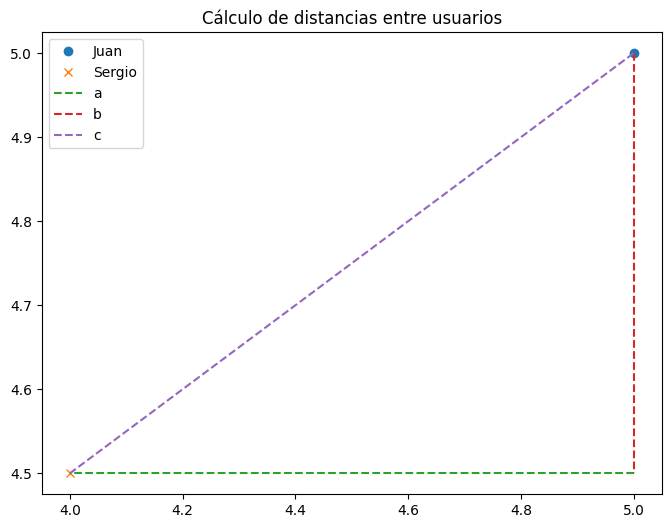

In [18]:
# supongamos dos usuarios, cuyas coordenadas en un gráfico cartesiano serían las siguientes

juan = [5,5]
sergio = [4,4.5]

# representamos gráficamente los puntos y el triangulo que forman

plt.figure(figsize = (8,6))
plt.plot(juan[0], juan[1], "o", label = "Juan")
plt.plot(sergio[0], sergio[1], "x", label = "Sergio")


plt.plot([juan[0],sergio[0]], [sergio[1], sergio[1]], "--", label = "a")
plt.plot([juan[0],juan[0]], [juan[0], sergio[1]], "--", label = "b")
plt.plot([juan[0],sergio[0]], [juan[1], sergio[1]], "--", label = "c")

plt.legend()

plt.title("Cálculo de distancias entre usuarios")


plt.show()

Con el triangulo representado y siguiendo Pitágoras, podemos afirmar que:

$$c = \sqrt{a^2 + b^2}$$

Con esta información, procederemos a calcular la distancia entre estos dos puntos, usando una función.

In [19]:
# importamos la libreria necesaria

from math import sqrt

In [20]:
# creamos la función

def pitagoras_prueba(punto1, punto2):

  a = punto2[0] - punto1[0]
  b = punto2[1] - punto1[1]

  a_2 = a ** 2
  b_2 = b ** 2

  c = sqrt(a_2 + b_2)

  return c

In [21]:
# probamos la función

pitagoras_prueba(sergio, juan)

1.118033988749895

Como bien es sabido, es habitual usar la libreria NumPy para trabajar en Python. Por lo que haremos el mismo proceso, pero usando una función que funcione con este tipo de arreglos.

In [22]:
# definimos la función para trabajar con NumPy

def pitagoras(array1, array2):

  (delta_x, delta_y) = array2 - array1
  resultado = sqrt(delta_x**2 + delta_y**2)

  return resultado

In [23]:
# creamos los arrays

juan_np = np.array(juan)
sergio_np = np.array(sergio)

# probamos la función

pitagoras(juan_np, sergio_np)

1.118033988749895

Lo normal es que a la hora de comparar dos elementos, estos tengan a su vez más de dos componentes, por lo que el método de Pitágoras tiene algunas limitaciones. Una solución a esta problemática viene dada por la función [linalg.norm()](https://numpy.org/doc/stable/reference/routines.linalg.html), que nos permite calcular distancias entre dos arrays.

Ahora vamos a definir una nueva función para poder medir las distancias entre arrays que tengan más de dos dimensiones.

In [24]:
# definimos la función

def medidor(array1, array2):

  distancia = np.linalg.norm(array2 - array1)

  return distancia

In [25]:
# probamos si la función funciona correctamente

medidor(juan_np, sergio_np)

1.118033988749895

Seguidamente, vamos a añadir un nuevo punto y vamos a calculas distancias entre los tres puntos.

In [26]:
# añadimos un tercer punto

carla = [4.5,3.5]

carla_np = np.array(carla)

In [27]:
# calculamos las distancias entre los puntos

print(f"La distancia entre Juan y Sergio es de {medidor(juan_np, sergio_np)}")
print(f"La distancia entre Carla y Sergio es de {medidor(carla_np, sergio_np)}")
print(f"La distancia entre Carla y Juan es de {medidor(juan_np, carla_np)}")

La distancia entre Juan y Sergio es de 1.118033988749895
La distancia entre Carla y Sergio es de 1.118033988749895
La distancia entre Carla y Juan es de 1.5811388300841898


In [28]:
# vamos a añadir una nueva dimensión a los datos

juan_np = np.array([5,5,4.5])
sergio_np = np.array([4,4.5,5])
carla_np = np.array([4.5,3.5,5])

# calculamos las distancias entre los arreglos


print(f"La distancia entre Juan y Sergio es de {medidor(juan_np, sergio_np)}")
print(f"La distancia entre Carla y Sergio es de {medidor(carla_np, sergio_np)}")
print(f"La distancia entre Carla y Juan es de {medidor(juan_np, carla_np)}")

La distancia entre Juan y Sergio es de 1.224744871391589
La distancia entre Carla y Sergio es de 1.118033988749895
La distancia entre Carla y Juan es de 1.6583123951777


In [29]:
# ahora vamos a seleccionar películas y notas que han visto algunos usuarios

usuario1 = notas.query("usuarioId == 1")[["peliculaId", "nota"]].set_index("peliculaId")
usuario4 = notas.query("usuarioId == 4")[["peliculaId", "nota"]].set_index("peliculaId")

In [30]:
# juntamos los usuarios

usuarios14 = usuario1.join(usuario4,

                     lsuffix = "_usu1",
                     rsuffix = "_usu4")

# eliminamos las peliculas que no han sido vistas por ambos

usuarios14.dropna(inplace = True)

In [31]:
# calculamos la distancia que hay entre ambos

medidor(np.array(usuarios14["nota_usu1"]), np.array(usuarios14["nota_usu4"]))

11.135528725660043

In [66]:
# creamos una función que nos permita medir las distancias entre dos usuarios

def distancia_usuarios(user1, user2):

  usuario1 = notas.query(f"usuarioId == {user1}")[["peliculaId", "nota"]].set_index("peliculaId")
  usuario2 = notas.query(f"usuarioId == {user2}")[["peliculaId", "nota"]].set_index("peliculaId")

  usuario12 =   usuario1.join(usuario2,
                  lsuffix = "_usu1",
                  rsuffix = "_usu2").dropna()

  nota_usu1 = np.array(usuario12["nota_usu1"])
  nota_usu2 = np.array(usuario12["nota_usu2"])

  distancia = medidor(nota_usu1, nota_usu2)


  if len(usuario12["nota_usu1"]) >= 5:
     return distancia

  else:
    return 50000

In [33]:
# probamos la función y vemos si nos da el mismo resultado que haciéndolo de manera manual

distancia_usuarios(1, 4)

11.135528725660043

In [34]:
# conseguimos los usuarios únicos

usuarios_unicos = np.unique(notas["usuarioId"])

In [54]:
# creamos la función para identificar las distancias de todos los usuarios respecto a un usuario de referncia

def df_distancia(usuario_ref):

    lista_usuarios = []
    lista_distancias = []

    for usuario in usuarios_unicos:

        distancia = distancia_usuarios(usuario_ref, usuario)
        distancia_float = distancia
        lista_usuarios.append(usuario)
        lista_distancias.append(distancia_float)

    df_usuario = pd.DataFrame({"usuarioId": np.array(lista_usuarios),
                               "distancia": np.array(lista_distancias)})

    df_usuario.sort_values("distancia", ascending = True, inplace = True)

    return df_usuario


In [67]:
# comprobamos los usuarios más a fines con el usuario de referencia 1

df_distancia(1).sort_values("distancia").head(15)

,usuarioId,distancia
0,1,0.000000
76,77,0.000000
510,511,0.500000
365,366,0.707107
522,523,1.000000
48,49,1.000000
8,9,1.000000
257,258,1.000000
318,319,1.118034
397,398,1.224745
